<a href="https://colab.research.google.com/github/Noruzzang/AIFFEL_QUEST_cr/blob/master/Python/Quest17/Quest_C_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 데이터 로드 및 전처리
data = pd.read_csv("/content/sample_data/diabetes.csv")  # 데이터 경로를 확인하세요
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# 데이터 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 데이터셋 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 사용자 정의 지표: F1 Score
class CustomF1Score(tf.keras.metrics.Metric):
    def __init__(self, name='custom_f1', **kwargs):
        super(CustomF1Score, self).__init__(name=name, **kwargs)
        self.tp = self.add_weight(name="tp", initializer="zeros")
        self.fp = self.add_weight(name="fp", initializer="zeros")
        self.fn = self.add_weight(name="fn", initializer="zeros")

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.cast(y_true, tf.float32)
        y_pred = tf.round(tf.cast(y_pred, tf.float32))

        true_positives = tf.reduce_sum(y_true * y_pred)
        predicted_positives = tf.reduce_sum(y_pred)
        actual_positives = tf.reduce_sum(y_true)

        self.tp.assign_add(true_positives)
        self.fp.assign_add(predicted_positives - true_positives)
        self.fn.assign_add(actual_positives - true_positives)

    def result(self):
        precision = self.tp / (self.tp + self.fp + tf.keras.backend.epsilon())
        recall = self.tp / (self.tp + self.fn + tf.keras.backend.epsilon())
        return 2 * ((precision * recall) / (precision + recall + tf.keras.backend.epsilon()))

    def reset_states(self):
        self.tp.assign(0)
        self.fp.assign(0)
        self.fn.assign(0)

# 사용자 정의 콜백: 학습률 스케줄링
class CustomLearningRateScheduler(Callback):
    def __init__(self):
        super(CustomLearningRateScheduler, self).__init__()

# 모델 생성 함수
def create_model(layer_depth, layer_width, learning_rate, activation):
    model = Sequential()
    # 첫 번째 레이어
    model.add(Dense(layer_width, input_shape=(X_train.shape[1],), activation=activation))
    # 은닉층 추가
    for _ in range(layer_depth - 1):
        model.add(Dense(layer_width, activation=activation))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy', CustomF1Score()])
    return model

# 실험 파라미터 설정
layer_depths = [1]  # 레이어 깊이 실험
layer_widths = [32]  # 레이어 너비 실험
learning_rates = [0.1]  # 학습률 실험
activations = ['relu']  # 활성화 함수 실험

# 모든 조합에 대해 모델 학습
for layer_depth in layer_depths:
    for layer_width in layer_widths:
        for learning_rate in learning_rates:
            for activation in activations:
                print(f'\nTraining model with depth={layer_depth}, width={layer_width}, '
                      f'learning_rate={learning_rate}, activation={activation}')

                model = create_model(layer_depth, layer_width, learning_rate, activation)

                # 모델 학습
                history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test),
                                    callbacks=[CustomLearningRateScheduler()], verbose=1)



Training model with depth=1, width=32, learning_rate=0.1, activation=relu
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6849 - custom_f1: 0.5871 - loss: 0.6024 - val_accuracy: 0.7403 - val_custom_f1: 0.6429 - val_loss: 0.5495
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7534 - custom_f1: 0.6450 - loss: 0.5316 - val_accuracy: 0.7532 - val_custom_f1: 0.6415 - val_loss: 0.5231
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7977 - custom_f1: 0.6888 - loss: 0.4500 - val_accuracy: 0.7662 - val_custom_f1: 0.6170 - val_loss: 0.5318
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7737 - custom_f1: 0.6369 - loss: 0.4699 - val_accuracy: 0.7597 - val_custom_f1: 0.6838 - val_loss: 0.5857
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7693 - custom_f1: 0.6498 - loss: 0.4935 - val_accuracy: 0.7727 - val_custom_f1: 0.6535 - val_loss: 0.5527
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7686 - custom_f1: 0.6369 - loss: 0.4556 - val_accuracy: 0.7597 - val_custom_f1: 0.6476 - val_loss

In [43]:
pip install matplotlib

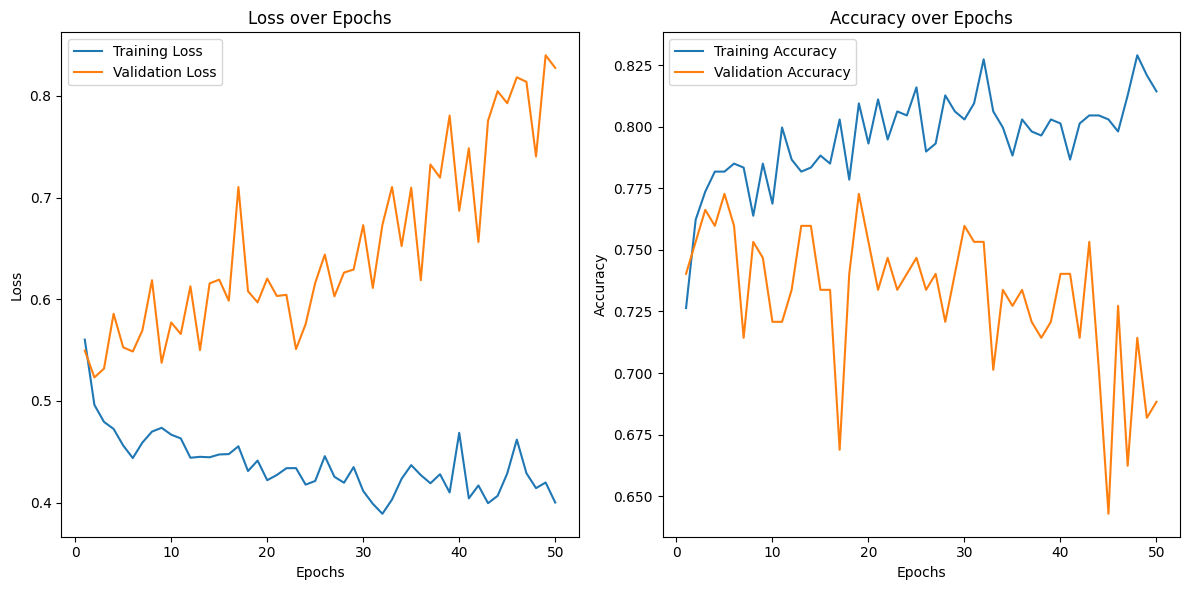

In [45]:
import matplotlib.pyplot as plt

# 학습 과정에서 기록된 손실과 정확도를 가져옵니다.
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# 에포크 수
epochs = range(1, len(loss) + 1)

# 손실 그래프
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1행 2열의 첫 번째 그래프
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 정확도 그래프
plt.subplot(1, 2, 2)  # 1행 2열의 두 번째 그래프
plt.plot(epochs, accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [46]:
# 실험 파라미터 설정
layer_depths = [3]  # 레이어 깊이 실험
layer_widths = [10]  # 레이어 너비 실험
learning_rates = [0.01]  # 학습률 실험
activations = ['tanh']  # 활성화 함수 실험

history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test),
                                    callbacks=[CustomLearningRateScheduler()], verbose=1)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8501 - custom_f1: 0.7931 - loss: 0.3702 - val_accuracy: 0.7143 - val_custom_f1: 0.6140 - val_loss: 0.8342
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8261 - custom_f1: 0.7404 - loss: 0.4030 - val_accuracy: 0.6883 - val_custom_f1: 0.5862 - val_loss: 0.8980
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8399 - custom_f1: 0.7747 - loss: 0.4001 - val_accuracy: 0.7143 - val_custom_f1: 0.6140 - val_loss: 0.8281
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8520 - custom_f1: 0.7911 - loss: 0.3618 - val_accuracy: 0.7338 - val_custom_f1: 0.6612 - val_loss: 0.8625
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8395 - custom_f1: 0.7784 - loss: 0.3743 - val_accuracy: 0.7208 - val_custom_f1: 0.6261 - val_loss: 0.8492
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8330 - custom_f1: 0.7332 - loss: 0.3513 - val_accuracy: 0.6818 - val_custom_f1: 0.6142

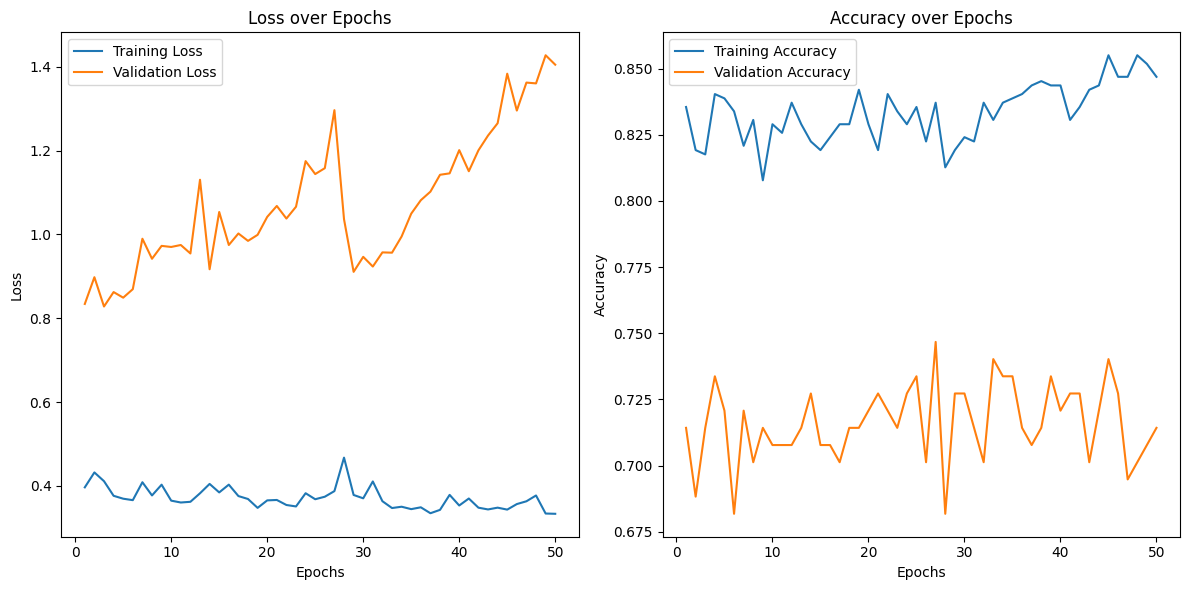

In [47]:
import matplotlib.pyplot as plt

# 학습 과정에서 기록된 손실과 정확도를 가져옵니다.
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# 에포크 수
epochs = range(1, len(loss) + 1)

# 손실 그래프
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1행 2열의 첫 번째 그래프
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 정확도 그래프
plt.subplot(1, 2, 2)  # 1행 2열의 두 번째 그래프
plt.plot(epochs, accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [51]:
# 실험 파라미터 설정
layer_depths = [5]  # 레이어 깊이 실험
layer_widths = [20]  # 레이어 너비 실험
learning_rates = [0.001]  # 학습률 실험
activations = ['sigmoid']  # 활성화 함수 실험

history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test),
                                    callbacks=[CustomLearningRateScheduler()], verbose=1)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8770 - custom_f1: 0.8361 - loss: 0.2971 - val_accuracy: 0.7078 - val_custom_f1: 0.5946 - val_loss: 1.4258
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8616 - custom_f1: 0.8007 - loss: 0.3372 - val_accuracy: 0.7143 - val_custom_f1: 0.6207 - val_loss: 1.4402
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8533 - custom_f1: 0.7797 - loss: 0.3017 - val_accuracy: 0.6818 - val_custom_f1: 0.6142 - val_loss: 1.6046
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8516 - custom_f1: 0.7937 - loss: 0.3352 - val_accuracy: 0.7078 - val_custom_f1: 0.6341 - val_loss: 1.5283
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8598 - custom_f1: 0.8193 - loss: 0.3013 - val_accuracy: 0.6883 - val_custom_f1: 0.5789 - val_loss: 1.6226
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8456 - custom_f1: 0.7729 - loss: 0.3189 - val_accuracy: 0.6948 - val_custom_f1: 0.576

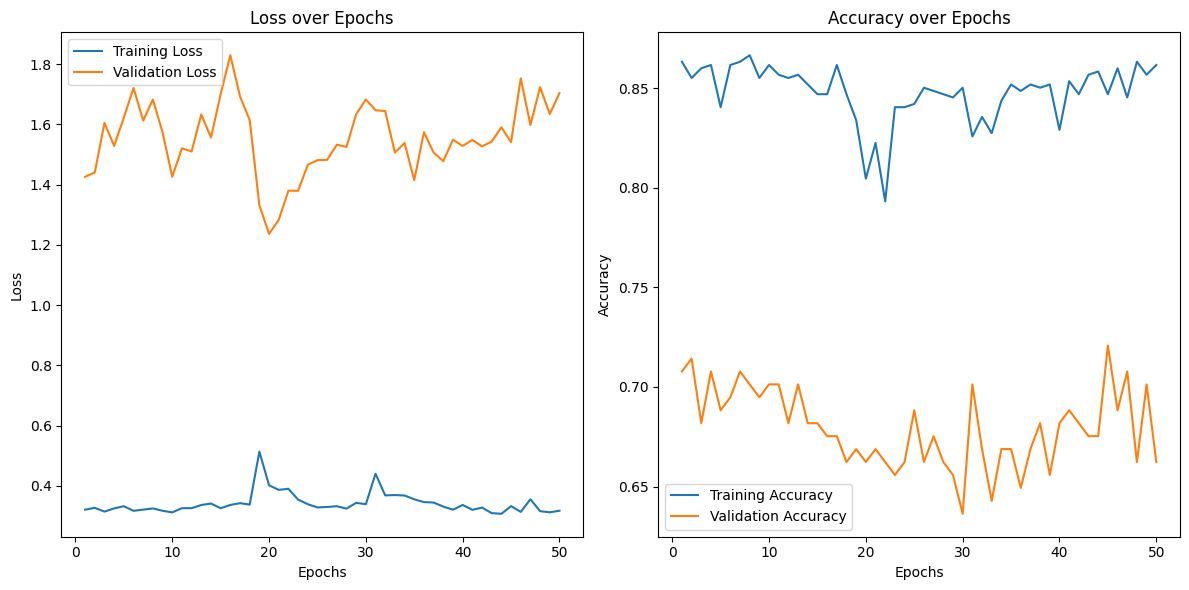

In [52]:
import matplotlib.pyplot as plt

# 학습 과정에서 기록된 손실과 정확도를 가져옵니다.
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# 에포크 수
epochs = range(1, len(loss) + 1)

# 손실 그래프
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1행 2열의 첫 번째 그래프
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 정확도 그래프
plt.subplot(1, 2, 2)  # 1행 2열의 두 번째 그래프
plt.plot(epochs, accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

코드에 무언가 문제가 있는 것 같다
그런데 그 문제를 찾을 수는 없다
어렵다
시간이 없다
짜증이난다